# Atividade Capítulo 14 – Análise e Predição de Produtos Agrícolas

**LucasLinsLima_RM564628_fase3_cap14**

**CarlaDonatoMaximo_RM564845_fase3_cap14**

**AnaCarolinaBorgesCornachi_RM564678_fase3_cap14**

**Fase:** Fase 3  

**Capítulo:** 14

---

## Introdução

Esta atividade tem como objetivo analisar uma base de dados contendo características de solo e clima, relacionando-as com diferentes tipos de culturas agrícolas. O estudo abrange desde uma análise exploratória dos dados até a construção e avaliação de modelos preditivos capazes de indicar a cultura mais adequada a partir das condições apresentadas. O trabalho está organizado nas seguintes etapas: análise exploratória, análise descritiva com visualizações, identificação de perfil de solo/clima para as culturas e desenvolvimento de modelos de machine learning.

## 1. Configuração Inicial

Nesta seção serão importadas as principais bibliotecas para análise e machine learning, além do carregamento do dataset "Atividade_Cap_14_produtos_agricolas.csv".

In [1]:
%pip install seaborn
%pip install scikit-learn


[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 25.0 -> 25.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# Importando as bibliotecas principais
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Previne warnings do pandas e seaborn
import warnings
warnings.filterwarnings('ignore')

csv_path = Path("Atividade_Cap_14_produtos_agricolas.csv")

try:
    df = pd.read_csv(csv_path)
    print(f"✅ Dataset carregado com sucesso: {csv_path.resolve()}")
except FileNotFoundError:
    print(f"❌ Arquivo não encontrado em: {csv_path.resolve()}")
    df = pd.DataFrame()
except Exception as e:
    print(f"❌ Erro ao carregar o dataset: {e}")
    df = pd.DataFrame()

if not df.empty:
    display(df.head())
else:
    print("⚠️ DataFrame vazio. Verifique o nome e a localização do CSV.")

✅ Dataset carregado com sucesso: /Users/acornachi/Desktop/FIAP_F3_CAP14/document/Atividade_Cap_14_produtos_agricolas.csv


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


A base de dados foi carregada utilizando a biblioteca `pandas`, que é amplamente empregada em projetos de análise de dados. 
No próximo passo, seguiremos para a análise exploratória para conhecer as principais características do conjunto de dados.

## 2. Análise Exploratória dos Dados (EDA)

Nesta etapa, vamos nos familiarizar com a base de dados, inspecionando suas primeiras linhas, estrutura, tipos de dados, possíveis valores ausentes, 
estatísticas descritivas e a distribuição das classes do produto agrícola (`label`).

###  Estatísticas Descritivas
Abaixo estão medidas como média, mediana e desvio padrão e valores extremos para todas as variáveis numéricas da base.

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.000000,21.000000,37.000000,84.250000,140.000000
P,2200.0,53.362727,32.985883,5.000000,28.000000,51.000000,68.000000,145.000000
K,2200.0,48.149091,50.647931,5.000000,20.000000,32.000000,49.000000,205.000000
temperature,2200.0,25.616244,5.063749,8.825675,22.769375,25.598693,28.561654,43.675493
humidity,2200.0,71.481779,22.263812,14.258040,60.261953,80.473146,89.948771,99.981876
ph,2200.0,6.469480,0.773938,3.504752,5.971693,6.425045,6.923643,9.935091
rainfall,2200.0,103.463655,54.958389,20.211267,64.551686,94.867624,124.267508,298.560117


###  Análise de Outliers
Foram gerados boxplots para identificar valores extremos nas variáveis, que podem impactar os modelos de forma negativa.

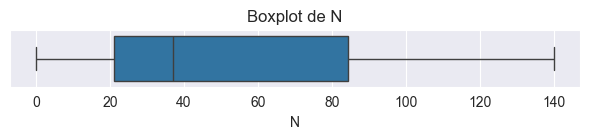

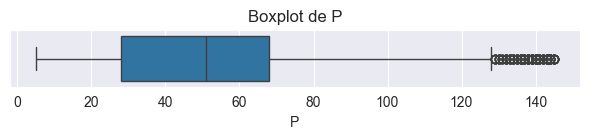

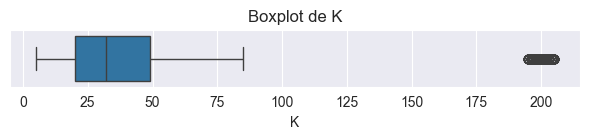

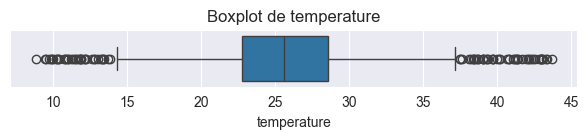

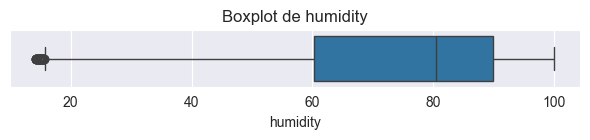

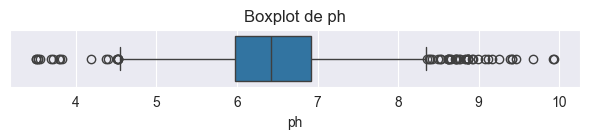

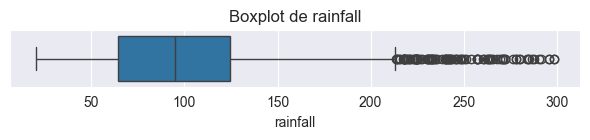

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.select_dtypes(include=['int64', 'float64']).columns:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot de {col}')
    plt.tight_layout()
    plt.show()

In [5]:
# Verificando o número de linhas e colunas do dataframe
print('Formato do dataset:', df.shape)

Formato do dataset: (2200, 8)


In [6]:
# Tipos de dados e contagem de valores não nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
# Verificando quantidade de valores nulos por coluna
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
# Estatísticas básicas das variáveis numéricas
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
# Frequência das culturas agrícolas registradas em 'label'
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

## Conclusão Da Análise Exploratória Dos Dados

O conjunto de dados é composto por 2200 linhas e 8 variáveis, das quais 7 são quantitativas (relacionadas a propriedades do solo e clima) e 1 categórica (tipo de cultura agrícola). Não foram encontrados valores nulos, o que indica um dataset completo e propício para análise e modelagem. As estatísticas descritivas mostram uma ampla variação nos valores das variáveis, refletindo diferentes tipos de ambientes de cultivo. Já a variável `label` indica que há 22 culturas agrícolas distintas, cada uma com exatamente 100 amostras, conferindo equilíbrio entre as classes.

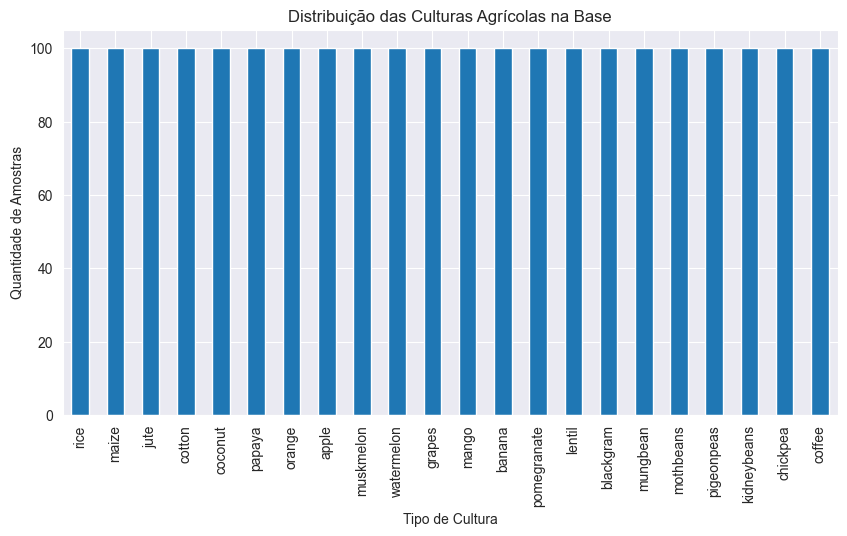

In [10]:
# Visualizar distribuição em gráfico de barras
df['label'].value_counts().plot(kind='bar', figsize=(10,5))
plt.xlabel('Tipo de Cultura')
plt.ylabel('Quantidade de Amostras')
plt.title('Distribuição das Culturas Agrícolas na Base')
plt.show()

## Conclusão da Distribuição das Culturas Agrícolas

A distribuição das culturas na base de dados é equilibrada, com 100 exemplos para cada uma das 22 culturas, tais como arroz, milho, jute, algodão, coco, banana, maçã, entre outras. Esse equilíbrio é importante para garantir imparcialidade na avaliação dos modelos preditivos desenvolvidos posteriormente.

## 3. Análise Descritiva com Gráficos

Nesta etapa, serão apresentadas visualizações que ajudam a entender melhor a distribuição e relação entre as variáveis do dataset. Após cada gráfico, será feita uma breve análise dos achados relevantes.

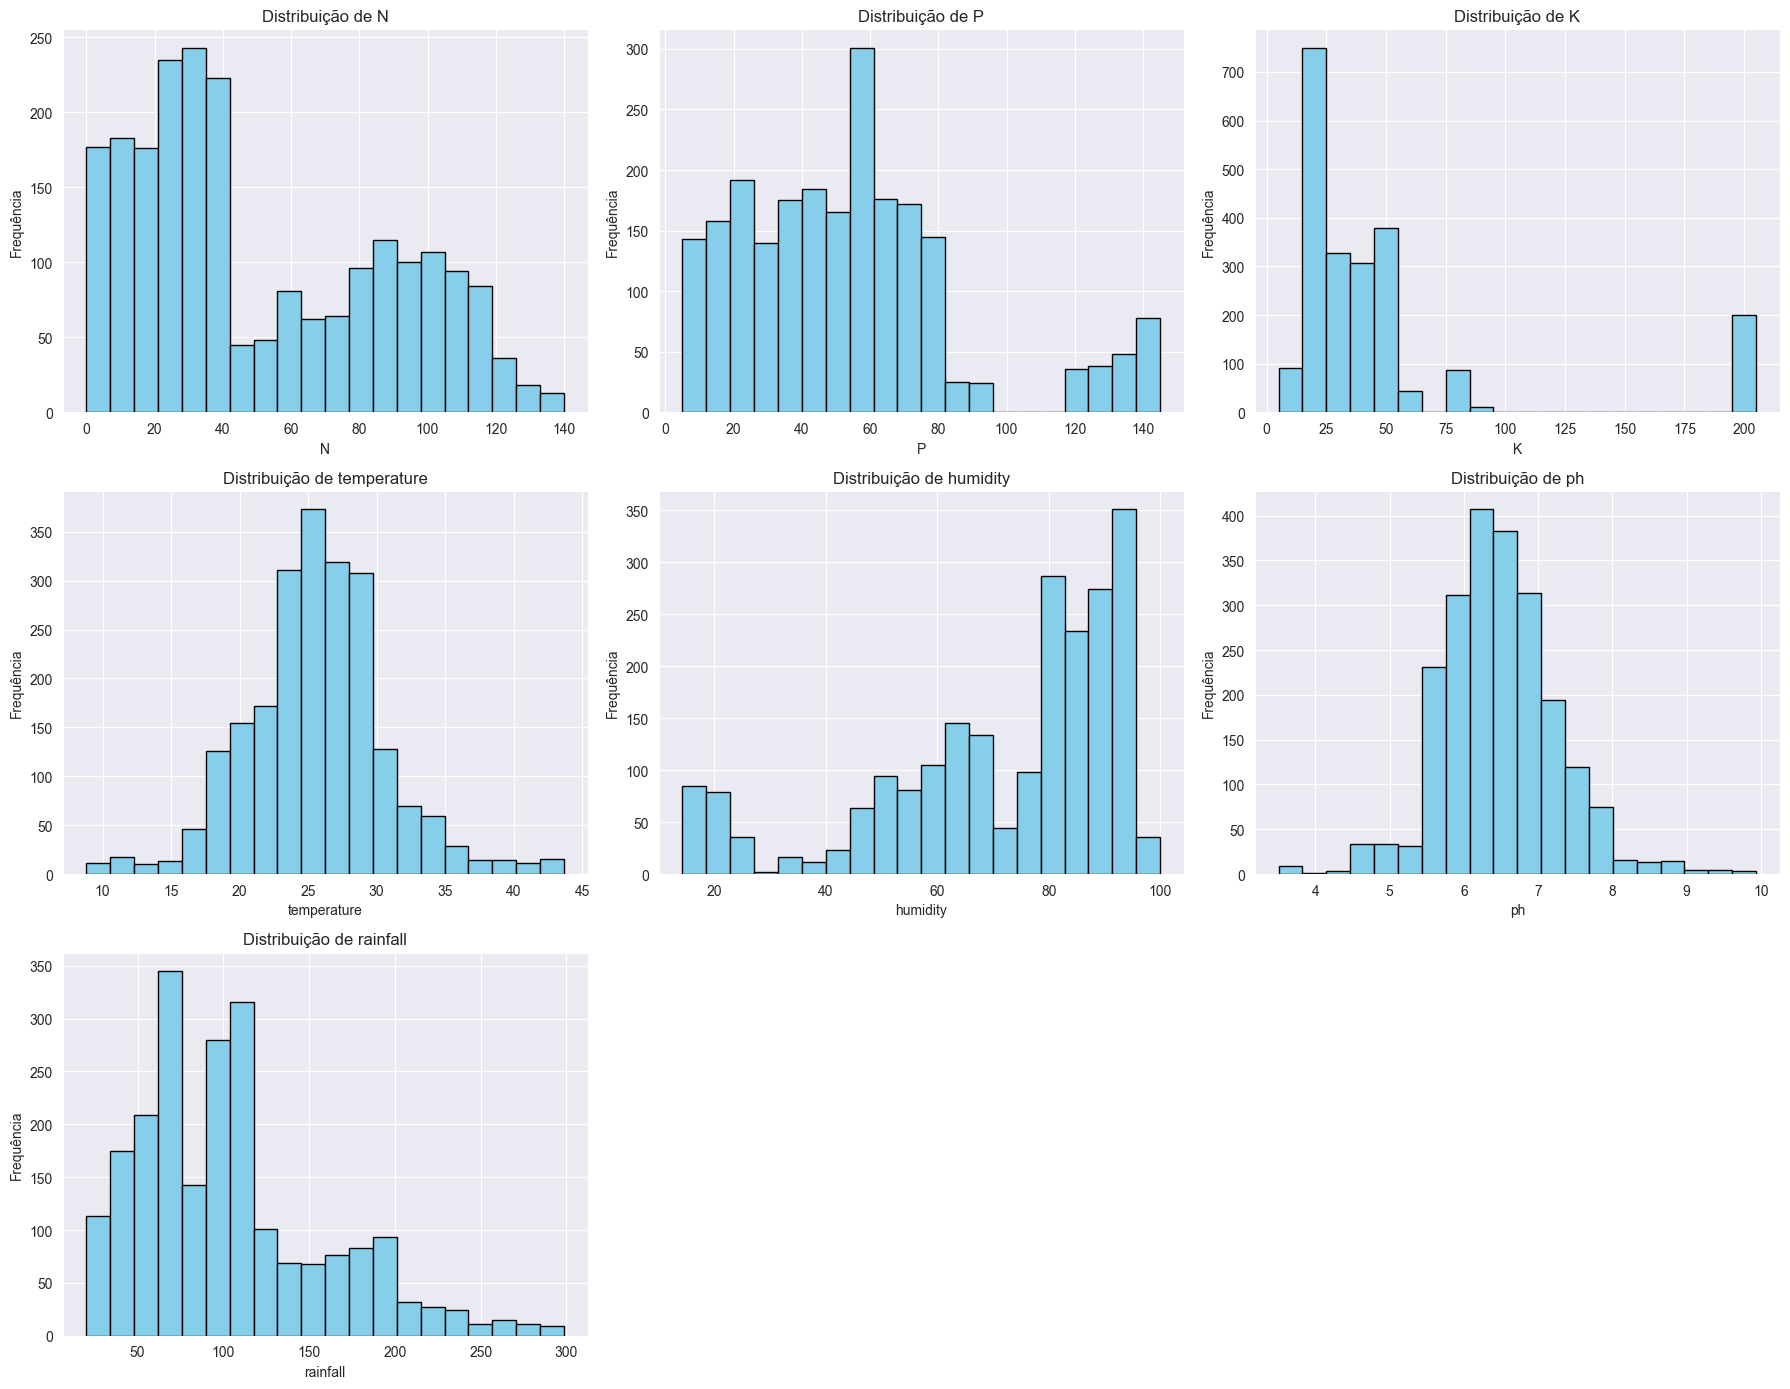

In [11]:
# Histogramas das Variáveis Numéricas
variaveis_numericas = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

plt.figure(figsize=(18, 14))
for idx, var in enumerate(variaveis_numericas):
    plt.subplot(3, 3, idx+1)
    plt.hist(df[var], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

## Conclusão da Análise das Distribuições das Variáveis Numéricas

Os histogramas mostram que as variáveis N (nitrogênio), P (fósforo), K (potássio), temperatura, umidade, pH e precipitação (rainfall) apresentam diferentes padrões de distribuição. Algumas variáveis, como pH, temperatura, e K apresentam distribuições mais concentradas, enquanto outras como rainfall e P apresentam uma dispersão maior. Isso pode indicar diferentes demandas ou tolerâncias das culturas em relação a esses fatores ambientais.

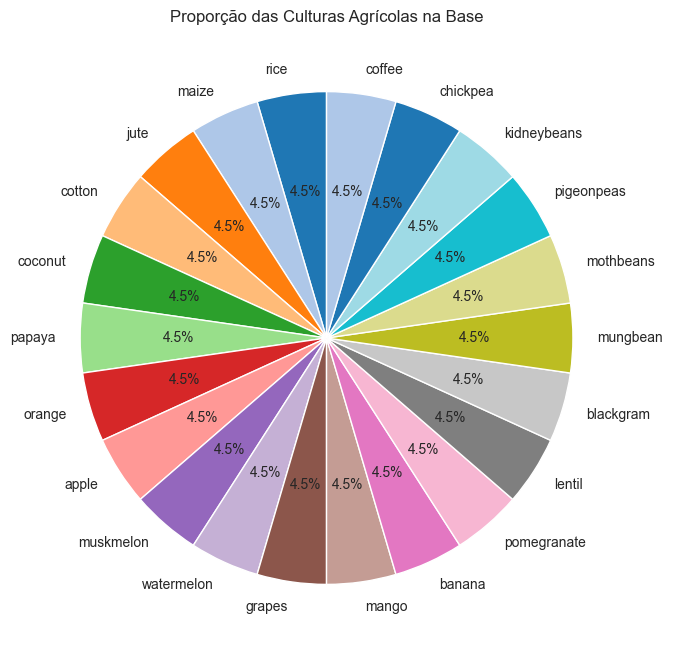

In [12]:
# Gráfico de Pizza exibindo a proporção relativa de cada cultura
df['label'].value_counts().plot(
    kind='pie',
    figsize=(8,8),
    autopct='%1.1f%%',
    startangle=90,
    colors=plt.cm.tab20.colors
)
plt.ylabel('')
plt.title('Proporção das Culturas Agrícolas na Base')
plt.show()

## Conclusão da Proporção Das Culturas Agrícolas

O gráfico de pizza reforça a distribuição equilibrada das culturas no dataset, onde cada cultura representa aproximadamente 4,5% do total das amostras.

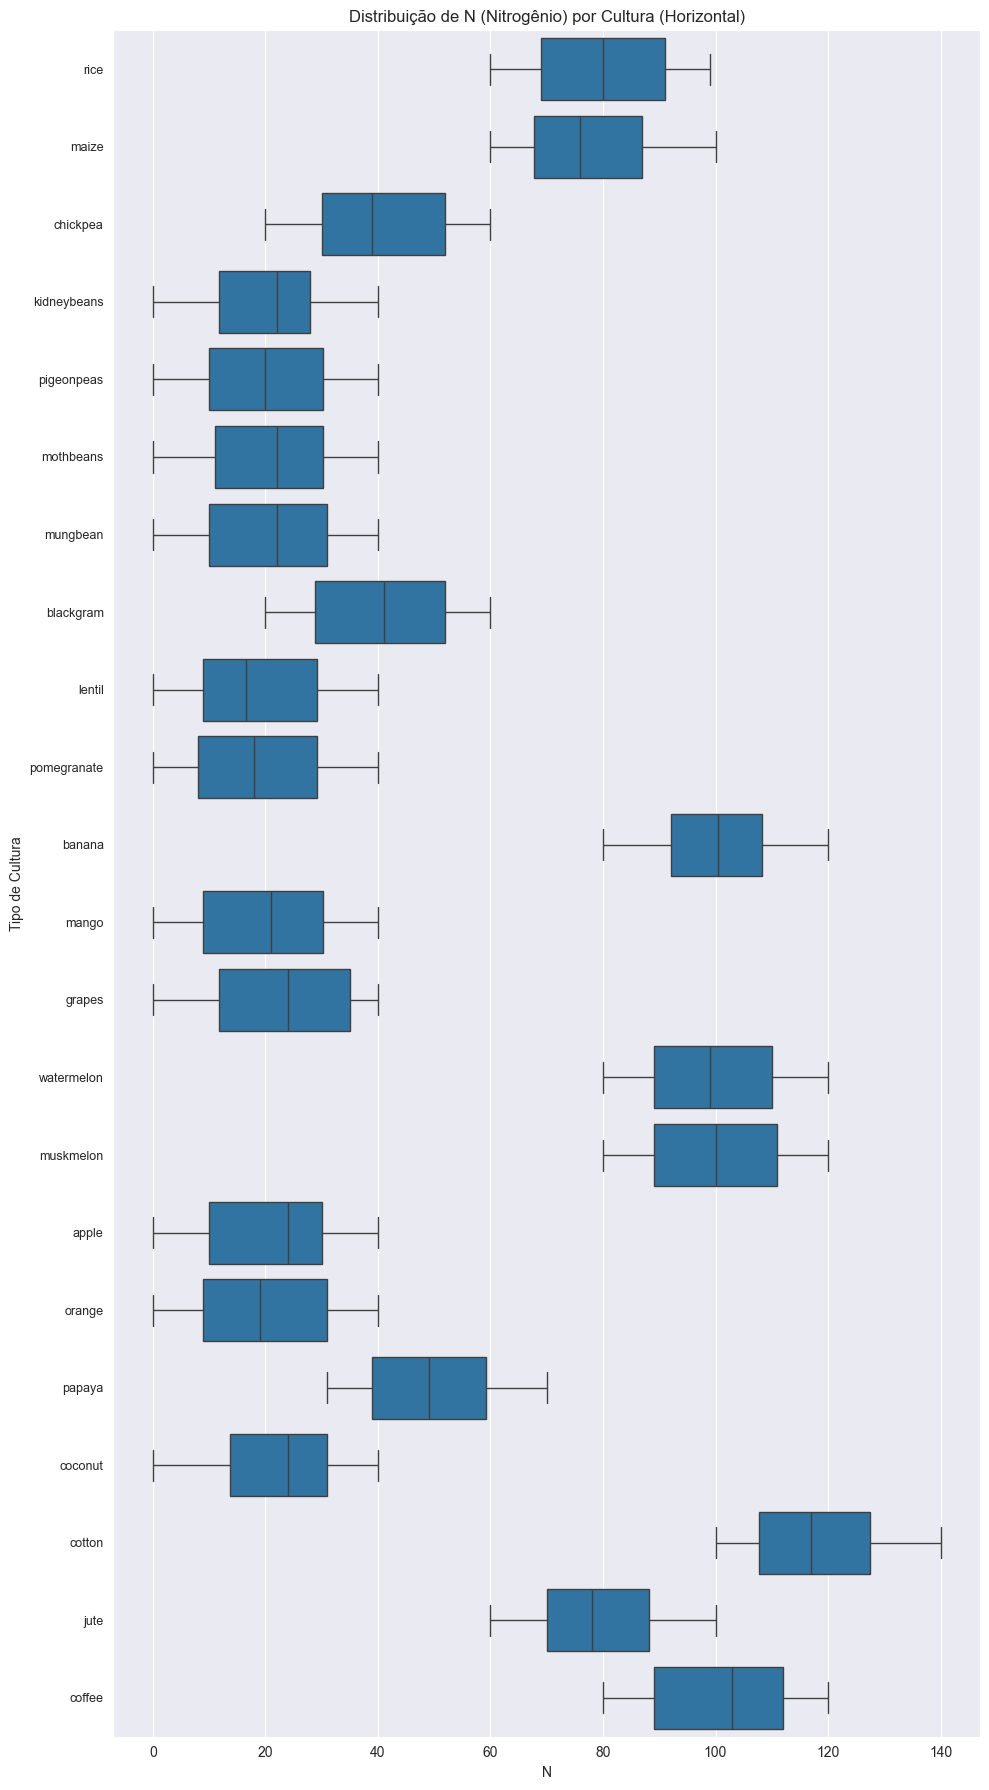

In [13]:
# Boxplots Variáveis vs Tipo de Cultura
plt.figure(figsize=(10, 18))
sns.boxplot(y='label', x='N', data=df)
plt.ylabel('Tipo de Cultura')
plt.xlabel('N')
plt.title('Distribuição de N (Nitrogênio) por Cultura (Horizontal)')
plt.tick_params(axis='y', labelsize=9)
plt.tight_layout()
plt.show()

## Conclusão da Distribuição do Nitrogênio (N) por Cultura

O boxplot das concentrações de nitrogênio mostra diferenças relevantes entre as culturas. Algumas, como banana e muskmelon, demandam teores mais elevados de nitrogênio, enquanto maçã, laranja e pomegranate se destacam por valores menores. Essa característica pode ser relevante para a recomendação de fertilização específica por tipo de cultura.

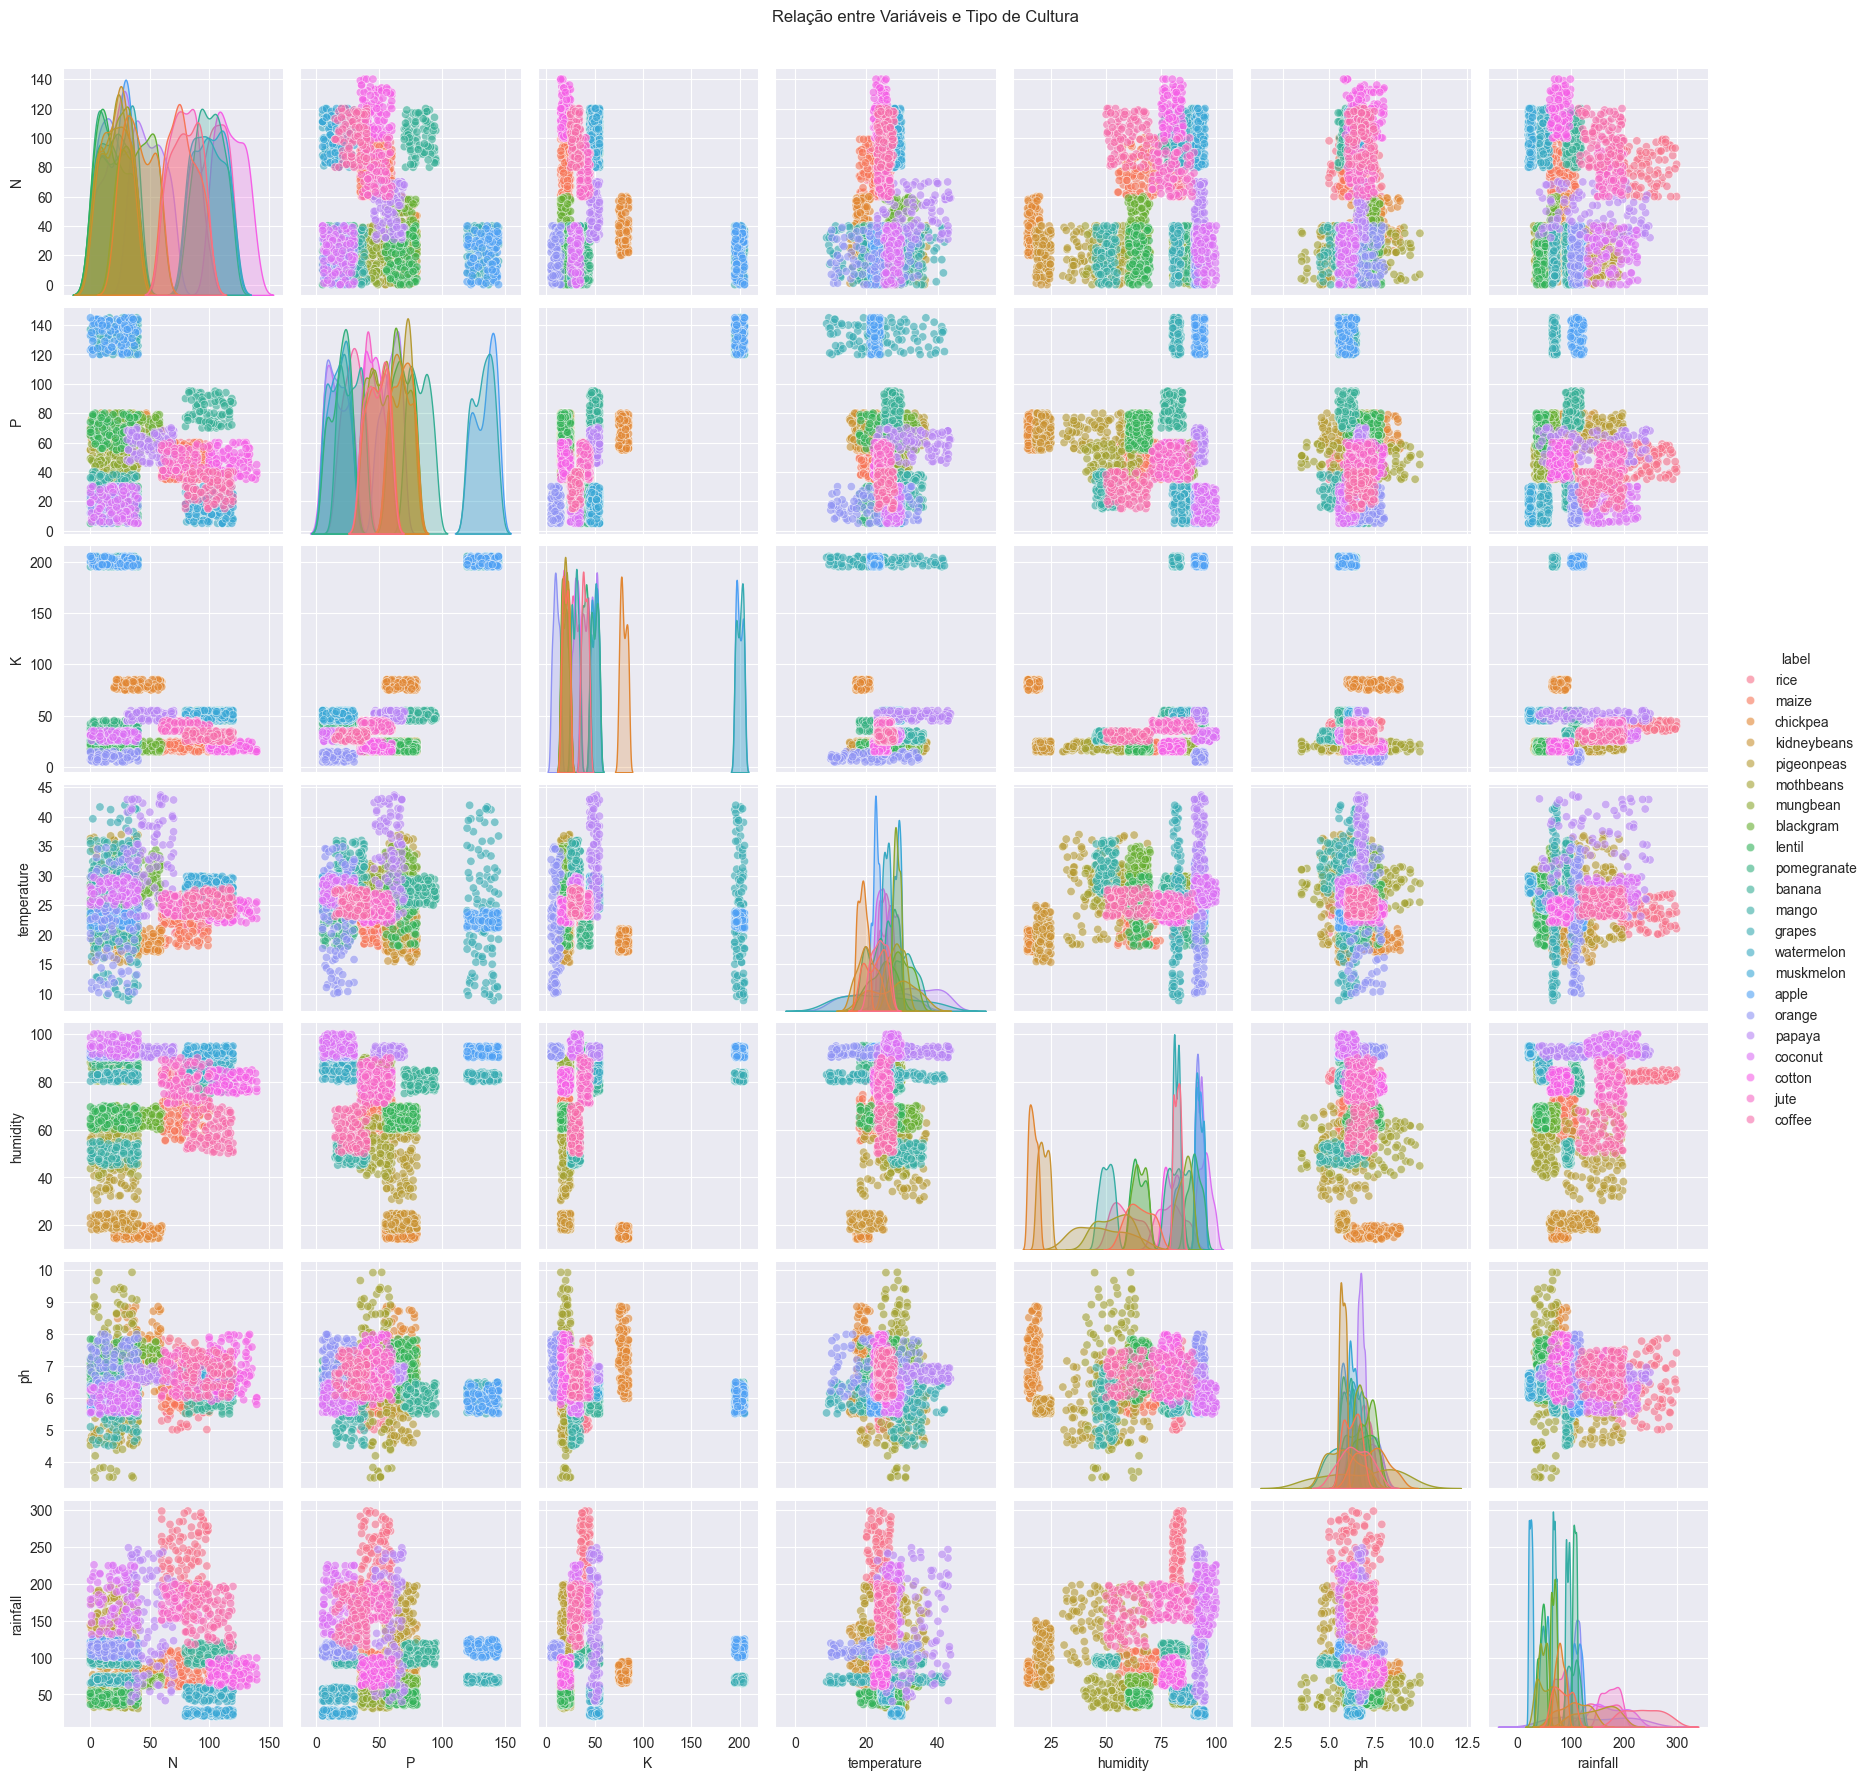

In [14]:
# Relação entre Variáveis e Tipo de Cultura (Pairplot)
sns.pairplot(df, hue="label", vars=variaveis_numericas, plot_kws={'alpha':0.6})
plt.suptitle('Relação entre Variáveis e Tipo de Cultura', y=1.02)
plt.show()

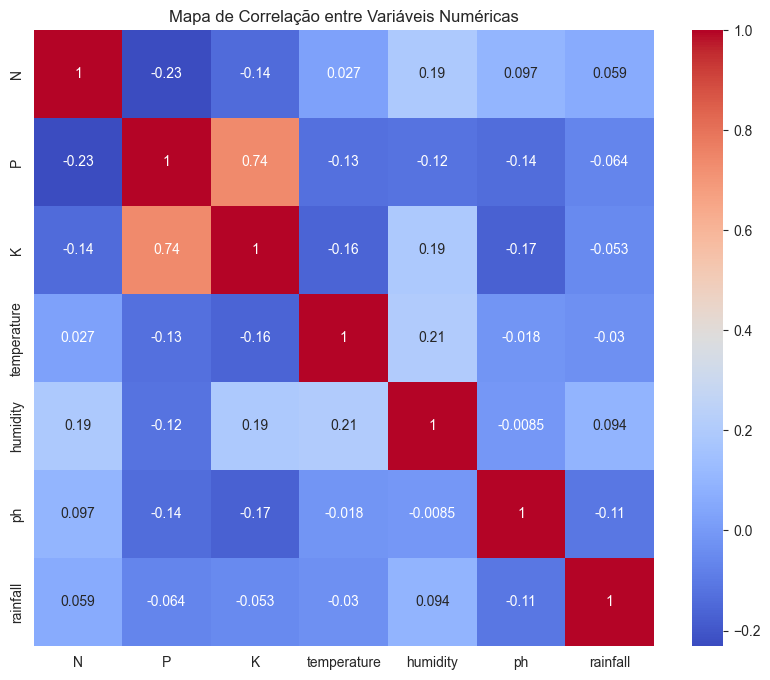

In [15]:
# Heatmap de Correlação das Variáveis Numéricas
plt.figure(figsize=(10, 8))
corr = df[variaveis_numericas].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Mapa de Correlação entre Variáveis Numéricas')
plt.show()

## Conclusão Das Relações Entre Variáveis

A análise visual do pairplot evidencia grupos de culturas com perfis semelhantes em alguns parâmetros, enquanto o heatmap de correlação demonstra que, na grande maioria, as variáveis numéricas apresentam baixas correlações entre si, indicando independência ou relações não-lineares entre elas. Somente as variaveis númericas P e K apresentam uma forte correlação. 

## 4. Identificação do Perfil Ideal de Solo/Clima e Comparação entre Culturas

Nesta etapa, vamos calcular o perfil médio e mediano das variáveis do solo e clima para cada cultura agrícola, definir um 
"perfil ideal" para o plantio em geral, e comparar três culturas específicas em relação a esse perfil, utilizando tabelas e gráficos de radar. 
Por fim, comentaremos as particularidades das preferências de cada cultura analisada.

In [16]:
# Calcule a média/mediana de cada parâmetro para cada cultura
# Seleção das variáveis numéricas
variaveis_numericas = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']

# Média por cultura
media_por_cultura = df.groupby('label')[variaveis_numericas].mean()
display(media_por_cultura)

# Mediana por cultura (opcional)
mediana_por_cultura = df.groupby('label')[variaveis_numericas].median()
display(mediana_por_cultura)

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,20.80,134.22,199.89,22.630942,92.333383,5.929663,112.654779
banana,100.23,82.01,50.05,27.376798,80.358123,5.983893,104.626980
blackgram,40.02,67.47,19.24,29.973340,65.118426,7.133952,67.884151
chickpea,40.09,67.79,79.92,18.872847,16.860439,7.336957,80.058977
coconut,21.98,16.93,30.59,27.409892,94.844272,5.976562,175.686646
coffee,101.20,28.74,29.94,25.540477,58.869846,6.790308,158.066295
cotton,117.77,46.24,19.56,23.988958,79.843474,6.912675,80.398043
grapes,23.18,132.53,200.11,23.849575,81.875228,6.025937,69.611829
jute,78.40,46.86,39.99,24.958376,79.639864,6.732778,174.792798


,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
apple,24.0,136.5,200.0,22.628290,92.416541,5.885818,112.979230
banana,100.5,81.0,50.0,27.443333,80.223599,5.994462,105.007750
blackgram,41.0,67.0,19.0,29.655515,65.026723,7.165240,68.293539
chickpea,39.0,68.0,79.0,18.878291,16.658634,7.356537,79.692282
coconut,24.0,15.5,31.0,27.385317,94.960581,5.990709,171.999922
coffee,103.0,29.0,30.0,25.656643,57.648083,6.798626,157.770963
cotton,117.0,46.0,19.0,23.964997,80.010893,6.840957,80.237095
grapes,24.0,133.0,201.0,23.018528,81.724647,6.001785,69.536186
jute,78.0,46.0,40.0,24.971106,79.469205,6.711500,175.590814


In [23]:
# Calculo do perfil ideal (média geral das melhores condições)
perfil_ideal = df[variaveis_numericas].mean().to_frame(name="Média Ideal")
display(perfil_ideal)

,Média Ideal
N,50.551818
P,53.362727
K,48.149091
temperature,25.616244
humidity,71.481779
ph,6.469480
rainfall,103.463655


In [24]:
# Seleção de 3 culturas para comparação
culturas_para_comparar = ['rice', 'maize', 'mothbeans']

perfil_culturas = media_por_cultura.loc[culturas_para_comparar]
perfil_culturas

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
rice,79.89,47.58,39.87,23.689332,82.272822,6.425471,236.181114
maize,77.76,48.44,19.79,22.389204,65.092249,6.245190,84.766988
mothbeans,21.44,48.01,20.23,28.194920,53.160418,6.831174,51.198487


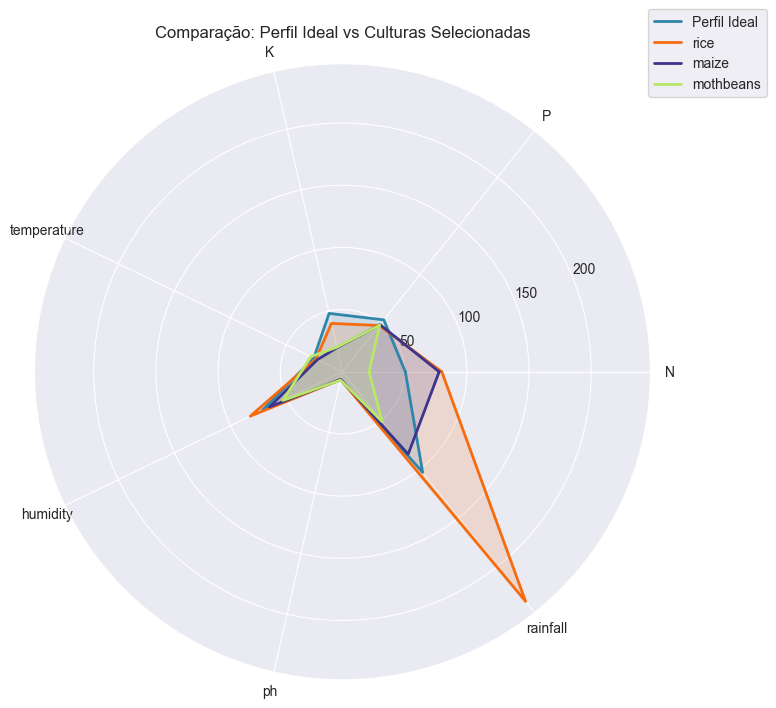

In [26]:
# Comparação Visual com Gráfico de Radar (Spider Chart)

# Define as variáveis numéricas que serão comparadas
labels = variaveis_numericas
num_vars = len(labels)

# Calcula o perfil ideal como uma Series (1D)
perfil_ideal = df[variaveis_numericas].mean()

# Cria uma cópia do DataFrame com os perfis das culturas
perfil_culturas_plot = perfil_culturas.copy()

# Adiciona o perfil ideal como nova linha (index = 'Perfil Ideal')
perfil_culturas_plot.loc['Perfil Ideal'] = perfil_ideal

# Reordena as linhas para que 'Perfil Ideal' fique em primeiro
perfil_culturas_plot = perfil_culturas_plot.reindex(['Perfil Ideal'] + culturas_para_comparar)

# Prepara os ângulos para o radar (1 por variável)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Fecha o círculo

# Inicializa o gráfico radar
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Define cores para as curvas
colors = ['#2E86AB', '#F66B0E', '#3D348B', '#B9E769']

# Gera a linha para cada cultura
for idx, (nome, row) in enumerate(perfil_culturas_plot.iterrows()):
    values = row.tolist()
    values += values[:1]  # Fecha o gráfico
    ax.plot(angles, values, label=nome, color=colors[idx % len(colors)], linewidth=2)
    ax.fill(angles, values, color=colors[idx % len(colors)], alpha=0.15)

# Define os rótulos de cada eixo
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1.1))
plt.title('Comparação: Perfil Ideal vs Culturas Selecionadas')
plt.show()


In [27]:
# Comparação Estatística em Tabela
display(perfil_culturas_plot)

,N,P,K,temperature,humidity,ph,rainfall
label,,,,,,,
Perfil Ideal,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
rice,79.890000,47.580000,39.870000,23.689332,82.272822,6.425471,236.181114
maize,77.760000,48.440000,19.790000,22.389204,65.092249,6.245190,84.766988
mothbeans,21.440000,48.010000,20.230000,28.194920,53.160418,6.831174,51.198487


## Conclusão do Perfil Ideal de Solo/Clima e Comparação entre Culturas

O perfil ideal, calculado como a média das condições para todo o conjunto de dados, serve como referência para práticas agrícolas mais amplas. Porém, cada cultura apresenta necessidades específicas:

- **Arroz (rice):** Apresenta valores médios elevados de nitrogênio e precipitação, bem acima do perfil ideal, indicando preferência por solos férteis e ambientes muito úmidos.
- **Milho (maize):** Demanda níveis elevados de N e P, mas menor demanda de potássio e precipitação. Apresenta preferência por solos menos úmidos que o arroz, porém mais quentes.
- **Mothbeans:** Necessita de níveis significativamente menores de N e K, e prefere ambientes mais secos (menor precipitação e umidade), com temperatura ligeiramente superior à média geral e pH um pouco mais elevado que o perfil ideal.

O gráfico de radar evidencia visualmente essas diferenças, mostrando como cada cultura se distancia ou se aproxima do perfil médio de plantio.

## 5. Modelagem Preditiva

Serão desenvolvidos 5 modelos diferentes de classificação para prever o tipo de cultura agrícola com base nas condições do solo e clima, avaliando a performance de cada um e discutindo os resultados.

In [28]:
# Pré-processamento dos Dados
# Separação em X (features) e y (target)
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

In [29]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Dados de treino: {X_train.shape[0]}')
print(f'Dados de teste: {X_test.shape[0]}')

Dados de treino: 1760
Dados de teste: 440


In [30]:
# Normalização/Padronização
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Treinamento dos 5 Modelos
# Instanciando os modelos
modelos = {
    'Árvore de Decisão': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42),
    'Regressão Logística': LogisticRegression(max_iter=1000, random_state=42)
}

In [32]:
# Avaliação dos Modelos
# Treinando, prevendo e armazenando resultados
resultados = {}

for nome, modelo in modelos.items():
    # Alguns modelos precisam dos dados escalados, outros não
    if nome in ['KNN', 'SVM', 'Regressão Logística']:
        modelo.fit(X_train_scaled, y_train)
        y_pred = modelo.predict(X_test_scaled)
    else:
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    resultados[nome] = {
        'modelo': modelo,
        'acuracia': acc,
        'y_pred': y_pred,
        'report': classification_report(y_test, y_pred, output_dict=True),
        'conf_matrix': confusion_matrix(y_test, y_pred)
    }
    print(f'{nome} - Acurácia: {acc:.4f}')

Árvore de Decisão - Acurácia: 0.9795
Random Forest - Acurácia: 0.9955
KNN - Acurácia: 0.9795
SVM - Acurácia: 0.9841
Regressão Logística - Acurácia: 0.9727


In [33]:
# Tabela comparativa das acurácias
acuracias = {nome: info['acuracia'] for nome, info in resultados.items()}
acuracias_df = pd.DataFrame.from_dict(acuracias, orient='index', columns=['acuracia'])
display(acuracias_df)

,acuracia
Árvore de Decisão,0.979545
Random Forest,0.995455
KNN,0.979545
SVM,0.984091
Regressão Logística,0.972727


###  Validação Cruzada
Foi aplicada validação cruzada para garantir que os resultados não estejam enviesados por uma única divisão dos dados.

In [34]:
from sklearn.model_selection import cross_val_score

for nome, modelo in modelos.items():
    scores = cross_val_score(modelo, X_train, y_train, cv=3)
    print(f"{nome} - Acurácia média (3-fold CV): {scores.mean():.2f}")

Árvore de Decisão - Acurácia média (3-fold CV): 0.98
Random Forest - Acurácia média (3-fold CV): 0.99
KNN - Acurácia média (3-fold CV): 0.97
SVM - Acurácia média (3-fold CV): 0.97
Regressão Logística - Acurácia média (3-fold CV): 0.97


## Conclusão Dos Modelos Preditivos e Avaliação de Performance

Foram desenvolvidos cinco modelos de machine learning: Árvore de Decisão, Random Forest, KNN, SVM e Regressão Logística, todos avaliados pelo critério de acurácia na predição da cultura com base nas condições do solo e clima.

- O modelo com **maior acurácia** foi o **Random Forest** (99,5%).
- O modelo com **menor acurácia** foi a **Regressão Logística** (97,3%).

Todos os modelos apresentaram desempenho bastante satisfatório, resultado favorecido pelo equilíbrio das classes e boa separabilidade entre as culturas a partir das variáveis disponíveis.

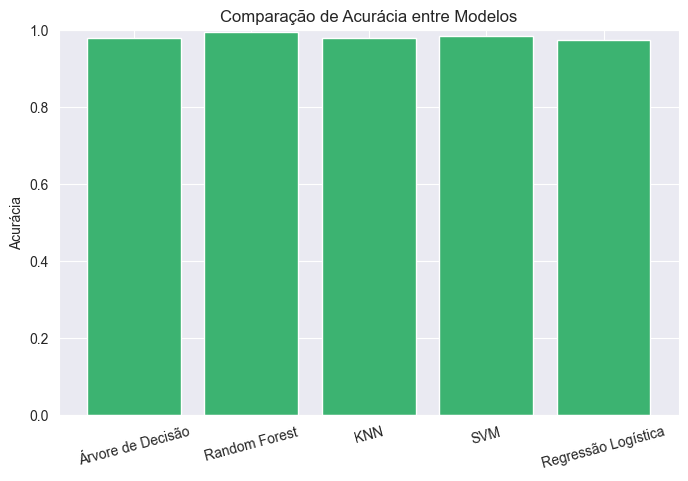

In [35]:
# Gráfico comparativo das acurácias
plt.figure(figsize=(8,5))
plt.bar(acuracias_df.index, acuracias_df['acuracia'], color='mediumseagreen')
plt.ylabel('Acurácia')
plt.ylim(0,1)
plt.title('Comparação de Acurácia entre Modelos')
plt.xticks(rotation=15)
plt.show()

Relatório de classificação - Random Forest:

              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.00   

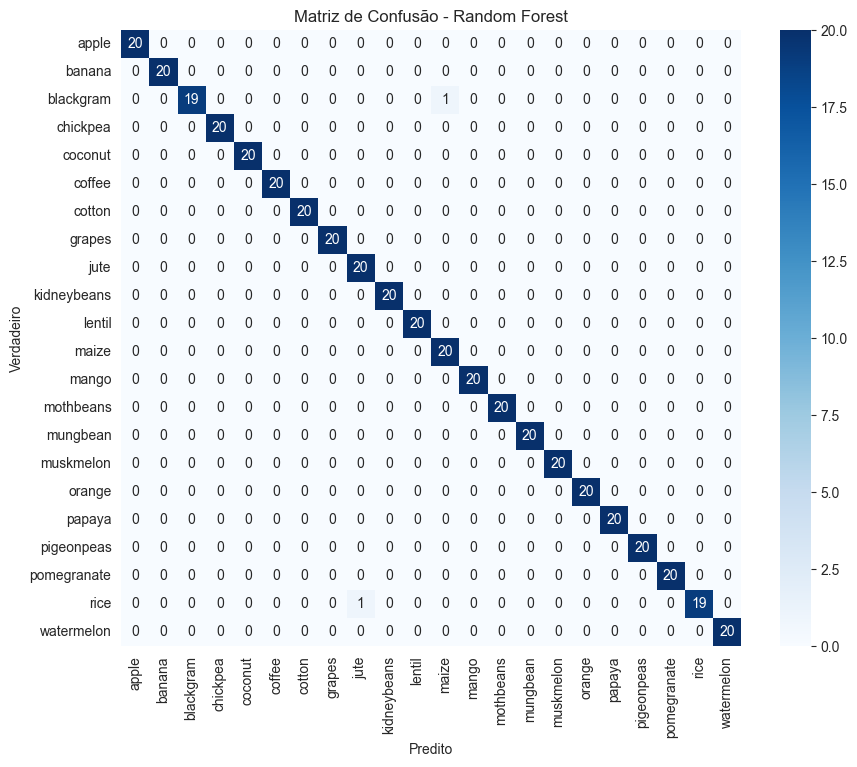

In [36]:
# Análise dos Relatórios e Matrizes de Confusão
# Modelo: Random Forest
modelo_escolhido = 'Random Forest'

print(f"Relatório de classificação - {modelo_escolhido}:\n")
print(classification_report(y_test, resultados[modelo_escolhido]['y_pred']))

conf_matrix = resultados[modelo_escolhido]['conf_matrix']

plt.figure(figsize=(10,8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=modelos['Random Forest'].classes_, 
            yticklabels=modelos['Random Forest'].classes_)
plt.ylabel('Verdadeiro')
plt.xlabel('Predito')
plt.title(f'Matriz de Confusão - {modelo_escolhido}')
plt.show()

## Conclusão da Matriz de Confusão e Relatório de Classificação

A matriz de confusão do modelo Random Forest mostra que praticamente todas as culturas foram corretamente classificadas, com erros mínimos em apenas alguns grupos (como rice e blackgram). O relatório de classificação reflete altas métricas de precision, recall e f1-score para todas as classes.

## 6. Recomendações dos Modelos de Predição

Com base na avaliação e performance de cada um dos 5 modelos diferentes de classificação para prever o tipo de cultura agrícola com base nas condições do solo e clima, agora iremos vizualisar as recomendações de cada um dos modelos de predição de forma prática.

In [37]:
# Organize as predições em um único DataFrame
resultados_predicoes = X_test.copy()
resultados_predicoes['Real'] = y_test.values

for nome, info in resultados.items():
    resultados_predicoes[nome] = info['y_pred']

In [38]:
# Mostre as primeiras 30 recomendações de cada modelo, com as condições climáticas e de solo:
display(resultados_predicoes.head(30))

,N,P,K,temperature,humidity,ph,rainfall,Real,Árvore de Decisão,Random Forest,KNN,SVM,Regressão Logística
1609,13,23,6,23.961476,90.264080,7.365338,102.695870,orange,orange,orange,orange,orange,orange
1072,98,79,50,25.341198,84.473213,6.435917,91.064934,banana,banana,banana,banana,banana,banana
1912,140,38,15,24.147295,75.882986,6.021440,69.915635,cotton,cotton,cotton,cotton,cotton,cotton
100,71,54,16,22.613600,63.690706,5.749914,87.759539,maize,maize,maize,maize,maize,maize
1645,40,22,6,24.536101,91.909972,6.488221,115.978799,orange,orange,orange,pomegranate,orange,orange
221,25,68,77,20.093406,15.112796,7.701446,85.749049,chickpea,chickpea,chickpea,chickpea,chickpea,chickpea
28,60,49,44,20.775761,84.497744,6.244841,240.081065,rice,rice,rice,rice,rice,rice
701,25,62,21,26.734340,68.139997,7.040056,67.150964,blackgram,blackgram,blackgram,blackgram,blackgram,blackgram
1097,110,71,54,28.672089,82.207936,5.725419,94.379875,banana,banana,banana,banana,banana,banana
1638,10,5,5,21.213070,91.353492,7.817846,112.983436,orange,orange,orange,orange,orange,orange


## Conclusão das previsões nas 30 primeiras recomendações

- Consistência: Observa-se que quase todos os modelos concordam entre si e, na maior parte dos casos, com a cultura real. Isso demonstra a confiabilidade dos modelos frente às variáveis (N, P, K, temperatura, umidade, pH, precipitação).

- Sensibilidade às condições: Mesmo com pequenas variações nos dados, os modelos foram robustos, indicando que aprenderam bem o perfil de cada cultura.

In [39]:
# Visualize para um cenário específico (perfil customizado)
# Exemplo de condição customizada
condicao_teste = pd.DataFrame([[80, 50, 40, 25, 80, 6.5, 150]], columns=['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'])

# Escale se for necessário para o modelo
condicao_teste_scaled = scaler.transform(condicao_teste)

print("Recomendações para condição customizada:")
for nome, modelo in modelos.items():
    if nome in ['KNN', 'SVM', 'Regressão Logística']:
        pred = modelo.predict(condicao_teste_scaled)
    else:
        pred = modelo.predict(condicao_teste)
    print(f"{nome}: {pred[0]}")

Recomendações para condição customizada:
Árvore de Decisão: jute
Random Forest: jute
KNN: jute
SVM: jute
Regressão Logística: jute


## Conclusão do Perfil Customizado

Todos os modelos sugerem jute como a opção ideal de plantio para este conjunto de condições. Isso mostra que, nesse cenário específico de solos razoavelmente férteis, clima ameno a levemente quente e chuvas moderadas, o cultivo do jute é o mais indicado. O usuário pode confiar que essa cultura, nessas condições, provavelmente trará melhor desempenho produtivo.

In [40]:
# Visualização automática por agrupamento
# Defina faixas de temperatura
resultados_predicoes['faixa_temp'] = pd.cut(
    resultados_predicoes['temperature'],
    bins=[0, 20, 25, 30, 50],
    labels=['frio', 'ameno', 'quente', 'muito quente']
)

# Para cada faixa de temperatura, mostre o produto mais recomendado por modelo:
for faixa in resultados_predicoes['faixa_temp'].unique():
    print(f"\nFaixa de Temperatura: {faixa}")
    temp_df = resultados_predicoes[resultados_predicoes['faixa_temp'] == faixa]
    for nome in modelos.keys():
        mais_recomendado = temp_df[nome].value_counts().idxmax()
        print(f"  {nome}: {mais_recomendado}")


Faixa de Temperatura: ameno
  Árvore de Decisão: apple
  Random Forest: apple
  KNN: apple
  SVM: apple
  Regressão Logística: apple

Faixa de Temperatura: quente
  Árvore de Decisão: banana
  Random Forest: banana
  KNN: banana
  SVM: banana
  Regressão Logística: banana

Faixa de Temperatura: frio
  Árvore de Decisão: chickpea
  Random Forest: chickpea
  KNN: chickpea
  SVM: chickpea
  Regressão Logística: chickpea

Faixa de Temperatura: muito quente
  Árvore de Decisão: mango
  Random Forest: mango
  KNN: mango
  SVM: mango
  Regressão Logística: mango


## Conclusão da Influencia da Temperatura Nas Recomendações

- Frio: O grão-de-bico (chickpea) sobressai em ambientes mais frios e secos, como observado pela frequência em ambientes de menor temperatura.
- Ameno: Maçã (apple) domina nas recomendações onde o clima é moderado, refletindo seu cultivo em regiões temperadas.
- Quente: Banana é preferida nos ambientes quentes e úmidos, padrão típico da cultura tropical.
- Muito quente: Manga é a principal recomendação para regiões com clima muito quente, condizente com sua resistência ao calor intenso.

Esses resultados reforçam o alinhamento dos modelos com o conhecimento agronômico tradicional e corroboram a adequação das recomendações para tomadas de decisão no campo.

## Considerações Finais

A atividade proposta teve como foco a análise detalhada de dados de solo e clima, relacionando-os com diferentes culturas agrícolas, e a construção de modelos preditivos capazes de indicar a cultura mais apropriada para determinadas condições ambientais. Foram seguidos todos os passos fundamentais de um projeto de ciência de dados: análise exploratória, estatística descritiva, visualização dos dados, extração de perfis ideais, construção e comparação de modelos, culminando com interpretações aplicadas e recomendações de plantio.

O conjunto de dados demonstrou-se robusto, com distribuição balanceada entre as culturas (22 tipos diferentes e 100 amostras para cada uma), ausência de valores nulos e variáveis bem representativas dos fatores que impactam o plantio agrícola (N, P, K, temperatura, umidade, pH e precipitação). As análises estatísticas e os gráficos possibilitaram identificar padrões distintos entre as variáveis e as exigências específicas de cada cultura, evidenciando tanto características compartilhadas quanto particularidades, como demandas mais altas de nitrogênio no banana ou maior pH para blackgram.

Na etapa de modelagem, cinco algoritmos supervisionados clássicos foram avaliados. O desempenho geral dos modelos foi excelente, destacando-se o Random Forest, que obteve acurácia de 99,5%, seguido pelos demais com valores próximos. O equilíbrio das classes e a boa separação dos grupos facilitaram esse resultado, comprovado também pela baixa incidência de erros nas matrizes de confusão e métricas como precision e recall elevadas para praticamente todas as culturas.

As recomendações dos modelos foram avaliadas tanto de forma geral quanto para cenários específicos, demonstrando concordância entre eles e robustez mesmo diante de pequenas variações nos dados. Ainda, a análise por faixa de temperatura mostrou o alinhamento das previsões dos modelos com o conhecimento técnico agrícola, indicando chickpea para clima frio, apple para ameno, banana para quente e mango para muito quente.

De maneira geral, o trabalho validou a eficiência dos métodos de análise e predição aplicados a dados agrícolas, mostrando seu potencial para contribuir em tomadas de decisão no campo, otimizando produções e adequando o cultivo ao ambiente. O processo proporcionou uma experiência prática completa de integração entre estatística, ciência de dados e agronomia, consolidando o aprendizado de construção e avaliação de sistemas preditivos.